# 1.Importação e Configurações <<a name="read"></a>
<div style="text-align: right"

[Voltar ao índice](#Contents)

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

# Filtra e ignora mensagens de aviso (Warnings)
warnings.filterwarnings('ignore')
# Configuração visual dos gráficos
sns.set_theme(style="whitegrid")
%matplotlib inline

# 2. Carregamento e Exploração Inicial<<a name="read"></a>
<div style="text-align: right"

[Voltar ao índice](#Contents)

In [7]:
# Carregando os dados
df = pd.read_csv('demo01.csv')

print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")
df.head()

O dataset possui 16650 linhas e 16 colunas.


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


# 3. Análise Exploratória (EDA)

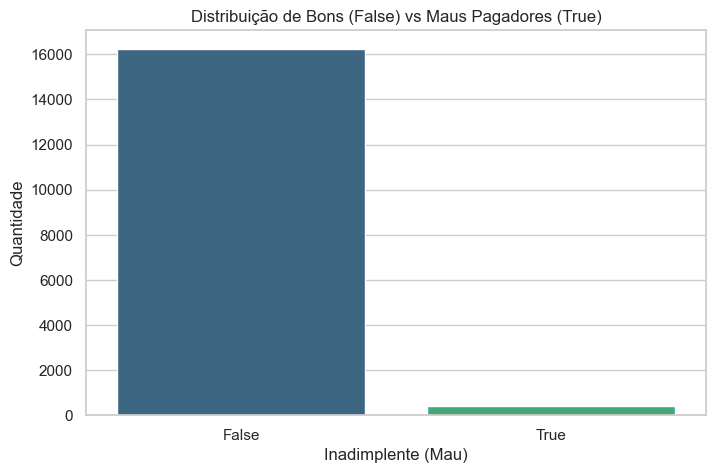

Taxa de inadimplência total: 2.34%


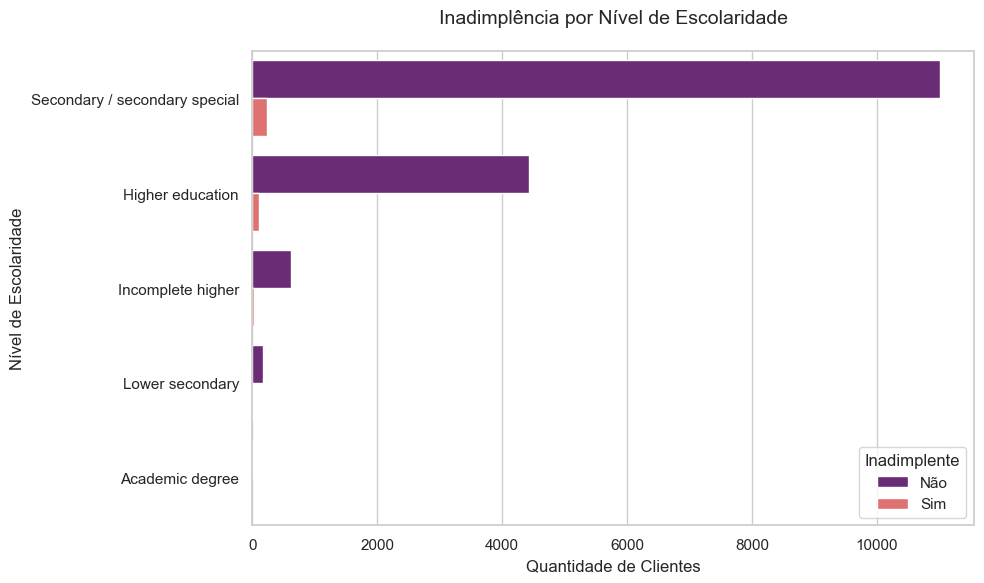

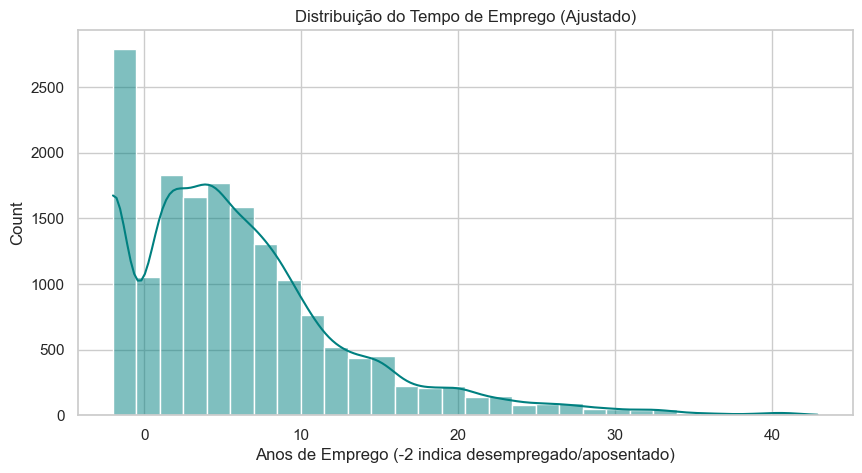

In [12]:
# 3.1 Distribuição da Variável Resposta (Inadimplência)
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='mau', data=df, palette='viridis')
plt.title('Distribuição de Bons (False) vs Maus Pagadores (True)')
plt.xlabel('Inadimplente (Mau)')
plt.ylabel('Quantidade')
plt.show()

# Cálculo da taxa de inadimplência
taxa_mau = df['mau'].mean() * 100
print(f"Taxa de inadimplência total: {taxa_mau:.2f}%")

# 3.2 Análise de Escolaridade vs Inadimplência (Um insight de negócio)
plt.figure(figsize=(10, 6))

# Usamos 'y' em vez de 'x' para tornar as barras horizontais
sns.countplot(data=df, y='educacao', hue='mau', palette='magma')

plt.title('Inadimplência por Nível de Escolaridade', fontsize=14, pad=20)
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Nível de Escolaridade')
plt.legend(title='Inadimplente', loc='lower right', labels=['Não', 'Sim'])

plt.tight_layout() # Ajusta o espaçamento para não cortar os nomes
plt.show()

# 3.3 Tratamento da variável Tempo de Emprego
# Identificamos valores de -1000 (provavelmente aposentados/desempregados)
# Vamos converter para -2 para melhorar a visualização e manter a distinção
df_plot = df.copy()
df_plot.loc[df_plot['tempo_emprego'] < 0, 'tempo_emprego'] = -2

plt.figure(figsize=(10, 5))
sns.histplot(df_plot['tempo_emprego'], bins=30, kde=True, color='teal')
plt.title('Distribuição do Tempo de Emprego (Ajustado)')
plt.xlabel('Anos de Emprego (-2 indica desempregado/aposentado)')
plt.show()

# 4. Pré-processamento

In [9]:
# Convertendo variáveis categóricas em Dummy (0 e 1)
# O drop_first=True evita o problema da multicolinearidade
df_dummies = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 
                                         'tipo_renda', 'educacao', 'estado_civil', 
                                         'tipo_residencia'], drop_first=True)

# Removendo a variável resposta do X
X = df_dummies.drop('mau', axis=1)
y = df_dummies['mau']

# Dividindo em Treino e Teste (70% treino / 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Dados de Treino: {X_train.shape[0]} amostras")
print(f"Dados de Teste: {X_test.shape[0]} amostras")

Dados de Treino: 11655 amostras
Dados de Teste: 4995 amostras


# 5. Modelagem e Avaliação

--- RELATÓRIO DE CLASSIFICAÇÃO ---
              precision    recall  f1-score   support

       False       0.98      0.99      0.99      4887
        True       0.36      0.19      0.25       108

    accuracy                           0.97      4995
   macro avg       0.67      0.59      0.62      4995
weighted avg       0.97      0.97      0.97      4995



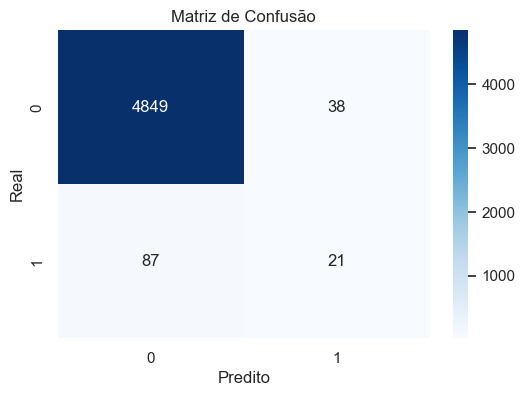

In [10]:
# Criando e treinando o modelo RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predições
y_pred = clf.predict(X_test)

# Avaliação do Modelo
print("--- RELATÓRIO DE CLASSIFICAÇÃO ---")
print(classification_report(y_test, y_pred))

# Matriz de Confusão Visual
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

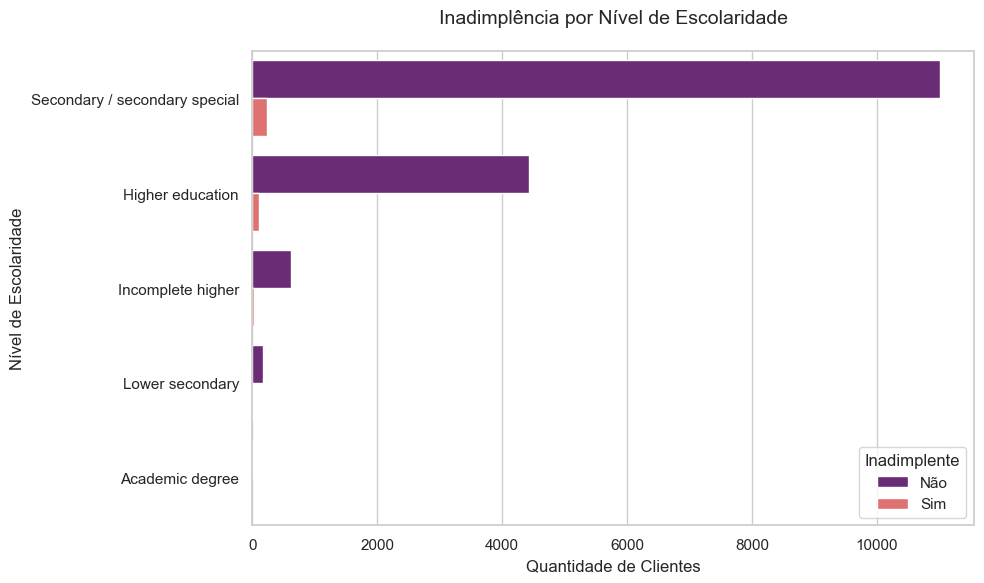

In [11]:
plt.figure(figsize=(10, 6))

# Usamos 'y' em vez de 'x' para tornar as barras horizontais
sns.countplot(data=df, y='educacao', hue='mau', palette='magma')

plt.title('Inadimplência por Nível de Escolaridade', fontsize=14, pad=20)
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Nível de Escolaridade')
plt.legend(title='Inadimplente', loc='lower right', labels=['Não', 'Sim'])

plt.tight_layout() # Ajusta o espaçamento para não cortar os nomes
plt.show()